# CLUSTERING 
Note to Ami: ClusteringRecordandTextData.py --
...\Python Scripts\TextMining\Week4_7


## Clustering Record and Text Data

Gates

In [1]:
import nltk
import pandas as pd
import sklearn
from sklearn.cluster import KMeans
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
## For Stemming
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
import os
import re   ## for regular expressions
from mpl_toolkits.mplot3d import Axes3D
#from nltk.stem.porter import PorterStemmer



##  Clustering Text Data from a Corpus 

DATA LINK: [https://drive.google.com/drive/folders/1VSofcdX6g86hjnofMDQJwYVveT544Oy4?usp=sharing]

In [2]:
path=os.path.join('ClusterCorpus')

## Get the text data first
print("calling os...")
FileNameList=os.listdir(path)
## check the TYPE
print(type(FileNameList))
print(FileNameList)

calling os...
<class 'list'>
['Choc1.txt', 'Choc2.txt', 'Choc3.txt', 'Choc4.txt', 'Choc5.txt', 'Choc6.txt', 'Hike1.txt', 'Hike2.txt', 'Hike3.txt', 'Hike4.txt', 'Hike5.txt', 'Hike6.txt']


I need an empty list to start with to build a list of complete paths to files.

Notice that I defined path above. I also need a list of file names.

In [3]:
ListOfCompleteFilePaths=[]
ListOfJustFileNames=[]

for name in os.listdir(path):
    ## BUILD the names dynamically....
    name=name.lower()
    print(path+ "/" + name)
    next=path+ "/" + name
    
    nextnameL=[re.findall(r'[a-z]+', name)[0]]  
    nextname=nextnameL[0]   ## Keep just the name
    print(nextname)  ## ALWAYS check yourself
    
    ListOfCompleteFilePaths.append(next)
    ListOfJustFileNames.append(nextname)

#print("DONE...")
print("full list...")
print(ListOfCompleteFilePaths)
print(ListOfJustFileNames)

ClusterCorpus/choc1.txt
choc
ClusterCorpus/choc2.txt
choc
ClusterCorpus/choc3.txt
choc
ClusterCorpus/choc4.txt
choc
ClusterCorpus/choc5.txt
choc
ClusterCorpus/choc6.txt
choc
ClusterCorpus/hike1.txt
hike
ClusterCorpus/hike2.txt
hike
ClusterCorpus/hike3.txt
hike
ClusterCorpus/hike4.txt
hike
ClusterCorpus/hike5.txt
hike
ClusterCorpus/hike6.txt
hike
full list...
['ClusterCorpus/choc1.txt', 'ClusterCorpus/choc2.txt', 'ClusterCorpus/choc3.txt', 'ClusterCorpus/choc4.txt', 'ClusterCorpus/choc5.txt', 'ClusterCorpus/choc6.txt', 'ClusterCorpus/hike1.txt', 'ClusterCorpus/hike2.txt', 'ClusterCorpus/hike3.txt', 'ClusterCorpus/hike4.txt', 'ClusterCorpus/hike5.txt', 'ClusterCorpus/hike6.txt']
['choc', 'choc', 'choc', 'choc', 'choc', 'choc', 'hike', 'hike', 'hike', 'hike', 'hike', 'hike']


###  Create the Stemmer Function

In [4]:

####################################################
##  Create the Stemmer Function.........
######################################################
## Instantiate it
A_STEMMER=PorterStemmer()
## test it
print(A_STEMMER.stem("fishers"))
#----------------------------------------
# Use NLTK's PorterStemmer in a function - DEFINE THE FUNCTION
#-------------------------------------------------------
def MY_STEMMER(str_input):
    ## Only use letters, no punct, no nums, make lowercase...
    words = re.sub(r"[^A-Za-z\-]", " ", str_input).lower().split()
    words = [A_STEMMER.stem(word) for word in words] ## Use the Stemmer...
    return words


fisher


CountVectorizers be set as 'content', 'file', or 'filename'
If set as ‘filename’, the **sequence passed as an argument to fit** is expected to be a list of filenames 
[https://scikit-learn.org/stable/modules/generated/]

sklearn.feature_extraction.text.CountVectorizer.html#
examples-using-sklearn-feature-extraction-text-countvectorizer

In [5]:
##################################################################
## Tokenize and Vectorize the text data from the corpus...
##############################################################
## Instantiate three Vectorizers.....
## Normal CV
MyVectCount=CountVectorizer(input='filename',
                        stop_words='english',
                        max_features=100
                        )
## Tf-idf vectorizer
MyVectTFIdf=TfidfVectorizer(input='filename',
                        stop_words='english',
                        max_features=100
                        )

## Create a CountVectorizer object that you can use with the Stemmer
MyCV_Stem = CountVectorizer(input="filename", 
                        stop_words='english', 
                        tokenizer=MY_STEMMER,
                        lowercase=True)


## NOw I can vectorize using my list of complete paths to my files
DTM_Count=MyVectCount.fit_transform(ListOfCompleteFilePaths)
DTM_TF=MyVectTFIdf.fit_transform(ListOfCompleteFilePaths)
DTM_stem=MyCV_Stem.fit_transform(ListOfCompleteFilePaths)

#####################
## Get the complete vocab - the column names
## !!!!!!!!! FOr TF and CV - but NOT for stemmed...!!!
##################
ColumnNames=MyVectCount.get_feature_names_out()
print("The vocab is: ", ColumnNames, "\n\n")
ColNamesStem=MyCV_Stem.get_feature_names_out()
print("The stemmed vocab is\n", ColNamesStem)

The vocab is:  ['bring' 'chocolate' 'coffee' 'day' 'delicious' 'dog' 'drink' 'eat'
 'exercise' 'feed' 'gear' 'good' 'great' 'healthy' 'hike' 'like'
 'mountain' 'needed' 'taking'] 


The stemmed vocab is
 ['bring' 'chocol' 'coffe' 'day' 'delici' 'dog' 'drink' 'eat' 'exercis'
 'feed' 'gear' 'good' 'great' 'healthi' 'hike' 'like' 'mountain' 'need'
 'togeth']


C:\Users\rokka\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\rokka\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'there

In [6]:
## Use pandas to create data frames
DF_Count=pd.DataFrame(DTM_Count.toarray(),columns=ColumnNames)
DF_TF=pd.DataFrame(DTM_TF.toarray(),columns=ColumnNames)
DF_stem=pd.DataFrame(DTM_stem.toarray(),columns=ColNamesStem)
print(DF_Count)
print(DF_TF.head())
print(DF_stem)

    bring  chocolate  coffee  day  delicious  dog  drink  eat  exercise  feed  \
0       0          3       2    1          2    0      1    1         0     0   
1       0          3       2    0          1    1      0    0         0     0   
2       0          3       1    0          2    0      0    0         0     0   
3       0          5       3    1          3    0      0    1         0     0   
4       0          9       4    2          5    1      0    2         0     1   
5       0          5       3    1          3    0      0    1         0     0   
6       1          1       0    0          0    0      0    0         2     0   
7       0          0       0    0          0    2      0    0         0     0   
8       0          1       0    0          0    3      0    0         0     0   
9       0          0       0    0          0    2      0    0         0     0   
10      0          0       0    0          0    4      0    0         0     0   
11      0          0       0


OK - now we have vectorized the data - and removed punct, numbers, etc.

From here, we can update the names of the rows without adding labels to the data.

We CANNOT have labels in the data because:
(1) Labels are not numeric and (2) Labels are NOT data - they are labels.



In [7]:
## Now update the row names
MyDict={}
for i in range(0, len(ListOfJustFileNames)):
    MyDict[i] = ListOfJustFileNames[i]

print("MY DICT:", MyDict)
        
DF_Count=DF_Count.rename(MyDict, axis="index")
print(DF_Count)

DF_TF=DF_TF.rename(MyDict, axis="index")
print(DF_TF)
## That's pretty!


MY DICT: {0: 'choc', 1: 'choc', 2: 'choc', 3: 'choc', 4: 'choc', 5: 'choc', 6: 'hike', 7: 'hike', 8: 'hike', 9: 'hike', 10: 'hike', 11: 'hike'}
      bring  chocolate  coffee  day  delicious  dog  drink  eat  exercise  \
choc      0          3       2    1          2    0      1    1         0   
choc      0          3       2    0          1    1      0    0         0   
choc      0          3       1    0          2    0      0    0         0   
choc      0          5       3    1          3    0      0    1         0   
choc      0          9       4    2          5    1      0    2         0   
choc      0          5       3    1          3    0      0    1         0   
hike      1          1       0    0          0    0      0    0         2   
hike      0          0       0    0          0    2      0    0         0   
hike      0          1       0    0          0    3      0    0         0   
hike      0          0       0    0          0    2      0    0         0   
hike     


##    Let's Cluster........


In [8]:
# Using sklearn
## you will need
## from sklearn.cluster import KMeans
## import numpy as np
kmeans_object_Count = sklearn.cluster.KMeans(n_clusters=2)
#print(kmeans_object)
kmeans_object_Count.fit(DF_Count)
# Get cluster assignment labels
labels = kmeans_object_Count.labels_
prediction_kmeans = kmeans_object_Count.predict(DF_Count)
#print(labels)
print(prediction_kmeans)
# Format results as a DataFrame
Myresults = pd.DataFrame([DF_Count.index,labels]).T
print(Myresults)

C:\Users\rokka\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rokka\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[1 1 1 1 1 1 0 0 0 0 0 0]
       0  1
0   choc  1
1   choc  1
2   choc  1
3   choc  1
4   choc  1
5   choc  1
6   hike  0
7   hike  0
8   hike  0
9   hike  0
10  hike  0
11  hike  0


In [9]:
############# ---> ALWAYS USE VIS! ----------
print(DF_Count)
print(DF_Count["chocolate"]) 
x=DF_Count["chocolate"]  ## col 1  starting from 0
y=DF_Count["hike"]    ## col 14  starting from 0
z=DF_Count["coffee"]  ## col 2  starting from 0
colnames=DF_Count.columns
print(colnames)
#print(x,y,z)
fig1 = plt.figure(figsize=(12, 12))
ax1 = Axes3D(fig1, rect=[0, 0, .90, 1], elev=48, azim=134)

ax1.scatter(x,y,z, cmap="RdYlGn", edgecolor='k', s=200,c=prediction_kmeans)
ax1.w_xaxis.set_ticklabels([])
ax1.w_yaxis.set_ticklabels([])
ax1.w_zaxis.set_ticklabels([])

ax1.set_xlabel('Chocolate', fontsize=25)
ax1.set_ylabel('Hike', fontsize=25)
ax1.set_zlabel('Coffee', fontsize=25)
#plt.show()
        
centers = kmeans_object_Count.cluster_centers_
print(centers)
#print(centers)
C1=centers[0,(1,2,14)]
print(C1)
C2=centers[1,(1,2,14)]
print(C2)
xs=C1[0],C2[0]
print(xs)
ys=C1[1],C2[1]
zs=C1[2],C2[2]


ax1.scatter(xs,ys,zs, c='black', s=2000, alpha=0.2)
plt.show()
#plt.cla()

#---------------- end of choc, dog, hike, example....

      bring  chocolate  coffee  day  delicious  dog  drink  eat  exercise  \
choc      0          3       2    1          2    0      1    1         0   
choc      0          3       2    0          1    1      0    0         0   
choc      0          3       1    0          2    0      0    0         0   
choc      0          5       3    1          3    0      0    1         0   
choc      0          9       4    2          5    1      0    2         0   
choc      0          5       3    1          3    0      0    1         0   
hike      1          1       0    0          0    0      0    0         2   
hike      0          0       0    0          0    2      0    0         0   
hike      0          1       0    0          0    3      0    0         0   
hike      0          0       0    0          0    2      0    0         0   
hike      0          0       0    0          0    4      0    0         0   
hike      0          0       0    0          0    4      0    0         0   

C:\Users\rokka\AppData\Local\Temp\ipykernel_18640\1632626361.py:14: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax1.w_xaxis.set_ticklabels([])
C:\Users\rokka\AppData\Local\Temp\ipykernel_18640\1632626361.py:15: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  ax1.w_yaxis.set_ticklabels([])
C:\Users\rokka\AppData\Local\Temp\ipykernel_18640\1632626361.py:16: MatplotlibDeprecationWarning: The w_zaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use zaxis instead.
  ax1.w_zaxis.set_ticklabels([])


<Figure size 1200x1200 with 0 Axes>


# kmeans with record data - 

## NEW DATA SETS....

DATA:

[https://drive.google.com/file/d/1QtuJO1S-03zDN4f8JgR7cZ1fA3wTZ_m4/view?usp=sharing]

and

[https://drive.google.com/file/d/1sSFzvxkp4wTbna8xAcPBCvInlA_MjNdj/view?usp=sharing]


In [10]:
Dataset1="ClusterSmallDataset5D.csv"
Dataset2="ClusterSmallDataset.csv"

DF5D=pd.read_csv(Dataset1)
DF3D=pd.read_csv(Dataset2)

print(DF3D.head())
print(DF5D.head())

         Label  Height  Weight  Age
0  BBallPlayer      84     250   17
1    NonPlayer      72     200   16
2    NonPlayer      70     210   15
3  BBallPlayer      86     278   18
4    NonPlayer      74     190   15
         Label  Height  Weight  Age  GPA  TestScore
0  BBallPlayer      84     250   17  3.8        994
1    NonPlayer      72     200   16  3.5        876
2    NonPlayer      70     210   15  3.6        769
3  BBallPlayer      86     278   18  3.9        901
4    NonPlayer      74     190   15  3.4        899


!!!!!!!!!!!!! This dataset has a label

We MUST REMOVE IT before we can proceed

In [11]:
TrueLabel3D=DF3D["Label"]
TrueLabel5D=DF5D["Label"]
print(TrueLabel3D)

0    BBallPlayer
1      NonPlayer
2      NonPlayer
3    BBallPlayer
4      NonPlayer
5    BBallPlayer
6    BBallPlayer
7      NonPlayer
8      NonPlayer
9    BBallPlayer
Name: Label, dtype: object


In [12]:
DF3D=DF3D.drop(['Label'], axis=1) #drop Label, axis = 1 is for columns
DF5D=DF5D.drop(['Label'], axis=1)

print(DF3D.head())

   Height  Weight  Age
0      84     250   17
1      72     200   16
2      70     210   15
3      86     278   18
4      74     190   15


In [13]:
kmeans_object3D = sklearn.cluster.KMeans(n_clusters=2)
kmeans_object5D = sklearn.cluster.KMeans(n_clusters=2)

#print(kmeans_object)
kmeans_3D=kmeans_object3D.fit(DF3D)
kmeans_5D=kmeans_object5D.fit(DF5D)
# Get cluster assignment labels
labels3D =kmeans_3D.labels_
labels5D =kmeans_5D.labels_

prediction_kmeans_3D = kmeans_object3D.predict(DF3D)
prediction_kmeans_5D = kmeans_object5D.predict(DF5D)

print("Prediction 3D\n")
print(prediction_kmeans_3D)
print("Actual\n")
print(TrueLabel3D)

print("Prediction 5D\n")
print(prediction_kmeans_5D)
print("Actual\n")
print(TrueLabel5D)

C:\Users\rokka\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rokka\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rokka\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rokka\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

Prediction 3D

[1 0 0 1 0 1 1 0 0 1]
Actual

0    BBallPlayer
1      NonPlayer
2      NonPlayer
3    BBallPlayer
4      NonPlayer
5    BBallPlayer
6    BBallPlayer
7      NonPlayer
8      NonPlayer
9    BBallPlayer
Name: Label, dtype: object
Prediction 5D

[1 1 0 1 1 1 1 1 0 1]
Actual

0    BBallPlayer
1      NonPlayer
2      NonPlayer
3    BBallPlayer
4      NonPlayer
5    BBallPlayer
6    BBallPlayer
7      NonPlayer
8      NonPlayer
9    BBallPlayer
Name: Label, dtype: object


## Convert True Labels from text to numeric labels...


In [14]:
##---------------------
## Convert True Labels from text to numeric labels...
##-----------------------
print(TrueLabel3D)
data_classes = ["BBallPlayer", "NonPlayer"]
dc = dict(zip(data_classes, range(0,2)))
print(dc)
TrueLabel3D_num=TrueLabel3D.map(dc, na_action='ignore')
print(TrueLabel3D_num)

0    BBallPlayer
1      NonPlayer
2      NonPlayer
3    BBallPlayer
4      NonPlayer
5    BBallPlayer
6    BBallPlayer
7      NonPlayer
8      NonPlayer
9    BBallPlayer
Name: Label, dtype: object
{'BBallPlayer': 0, 'NonPlayer': 1}
0    0
1    1
2    1
3    0
4    1
5    0
6    0
7    1
8    1
9    0
Name: Label, dtype: int64


In [15]:
############# ---> ALWAYS USE VIS! ----------

fig2 = plt.figure(figsize=(12, 12))
ax2 = Axes3D(fig2, rect=[0, 0, .90, 1], elev=48, azim=134)
print(DF3D)
x=DF3D.iloc[:,0] ## Height
y=DF3D.iloc[:,1] ## Weight
z=DF3D.iloc[:,2] ## Age
print(x,y,z)

ax2.scatter(x,y,z, cmap="RdYlGn", edgecolor='k', s=200,c=prediction_kmeans_3D)
ax2.w_xaxis.set_ticklabels([])
ax2.w_yaxis.set_ticklabels([])
ax2.w_zaxis.set_ticklabels([])

ax2.set_xlabel('Height', fontsize=25)
ax2.set_ylabel('Weight', fontsize=25)
ax2.set_zlabel('Age', fontsize=25)
plt.show()

   Height  Weight  Age
0      84     250   17
1      72     200   16
2      70     210   15
3      86     278   18
4      74     190   15
5      80     245   16
6      79     267   19
7      71     187   15
8      69     211   14
9      82     289   17
0    84
1    72
2    70
3    86
4    74
5    80
6    79
7    71
8    69
9    82
Name: Height, dtype: int64 0    250
1    200
2    210
3    278
4    190
5    245
6    267
7    187
8    211
9    289
Name: Weight, dtype: int64 0    17
1    16
2    15
3    18
4    15
5    16
6    19
7    15
8    14
9    17
Name: Age, dtype: int64


C:\Users\rokka\AppData\Local\Temp\ipykernel_18640\141251061.py:12: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax2.w_xaxis.set_ticklabels([])
C:\Users\rokka\AppData\Local\Temp\ipykernel_18640\141251061.py:13: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  ax2.w_yaxis.set_ticklabels([])
C:\Users\rokka\AppData\Local\Temp\ipykernel_18640\141251061.py:14: MatplotlibDeprecationWarning: The w_zaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use zaxis instead.
  ax2.w_zaxis.set_ticklabels([])


<Figure size 1200x1200 with 0 Axes>

These centers should make sense. Notice the actual values....

The BBPlayers will be taller, higher weight, higher age     

In [16]:
centers3D = kmeans_3D.cluster_centers_
print(centers3D)
print(centers3D[0,0])
xs=(centers3D[0,0], centers3D[1,0])
ys=(centers3D[0,1], centers3D[1,1])
zs=(centers3D[0,2], centers3D[1,2])


ax2.scatter(xs,ys,zs, c='black', s=2000, alpha=0.2)
plt.show()

[[ 71.2 199.6  15. ]
 [ 82.2 265.8  17.4]]
71.2


## Looking at distances

In [17]:
DF3D.head()

## Let's find the distances between each PAIR
## of vectors. What is a vector? It is a data row.
## For example:  [84       250         17]
## Where, in this case, 84 is the value for height
## 250 is weight, and 17 is age.

X=DF3D


In [18]:
from sklearn.metrics.pairwise import euclidean_distances
## Distance between each pair of rows (vectors)
Euc_dist=euclidean_distances(X, X)

from sklearn.metrics.pairwise import manhattan_distances
Man_dist=manhattan_distances(X,X)

from sklearn.metrics.pairwise import cosine_distances
Cos_dist=cosine_distances(X,X)

from sklearn.metrics.pairwise import cosine_similarity
Cos_Sim=cosine_similarity(X,X)


The cosine distance is equivalent to the half the squared euclidean distance if each sample is normalized to unit norm

[[  0.          51.42956348  42.42640687  28.08914381  60.86049622
    6.4807407   17.8325545   64.35837164  41.89272013  39.05124838]
 [ 51.42956348   0.          10.24695077  79.27168473  10.24695077
   45.70557953  67.43144667  13.07669683  11.5758369   89.5656184 ]
 [ 42.42640687  10.24695077   0.          69.92138443  20.39607805
   36.41428291  57.84461946  23.02172887   1.73205081  79.93122043]
 [ 28.08914381  79.27168473  69.92138443   0.          88.86506625
   33.60059523  13.07669683  92.27675764  69.23871749  11.74734012]
 [ 60.86049622  10.24695077  20.39607805  88.86506625   0.
   55.33534133  77.26577509   4.24264069  21.61018278  99.34284071]
 [  6.4807407   45.70557953  36.41428291  33.60059523  55.33534133
    0.          22.22611077  58.70264049  35.79106034  44.05678154]
 [ 17.8325545   67.43144667  57.84461946  13.07669683  77.26577509
   22.22611077   0.          80.49844719  57.10516614  22.29349681]
 [ 64.35837164  13.07669683  23.02172887  92.27675764   4.24264

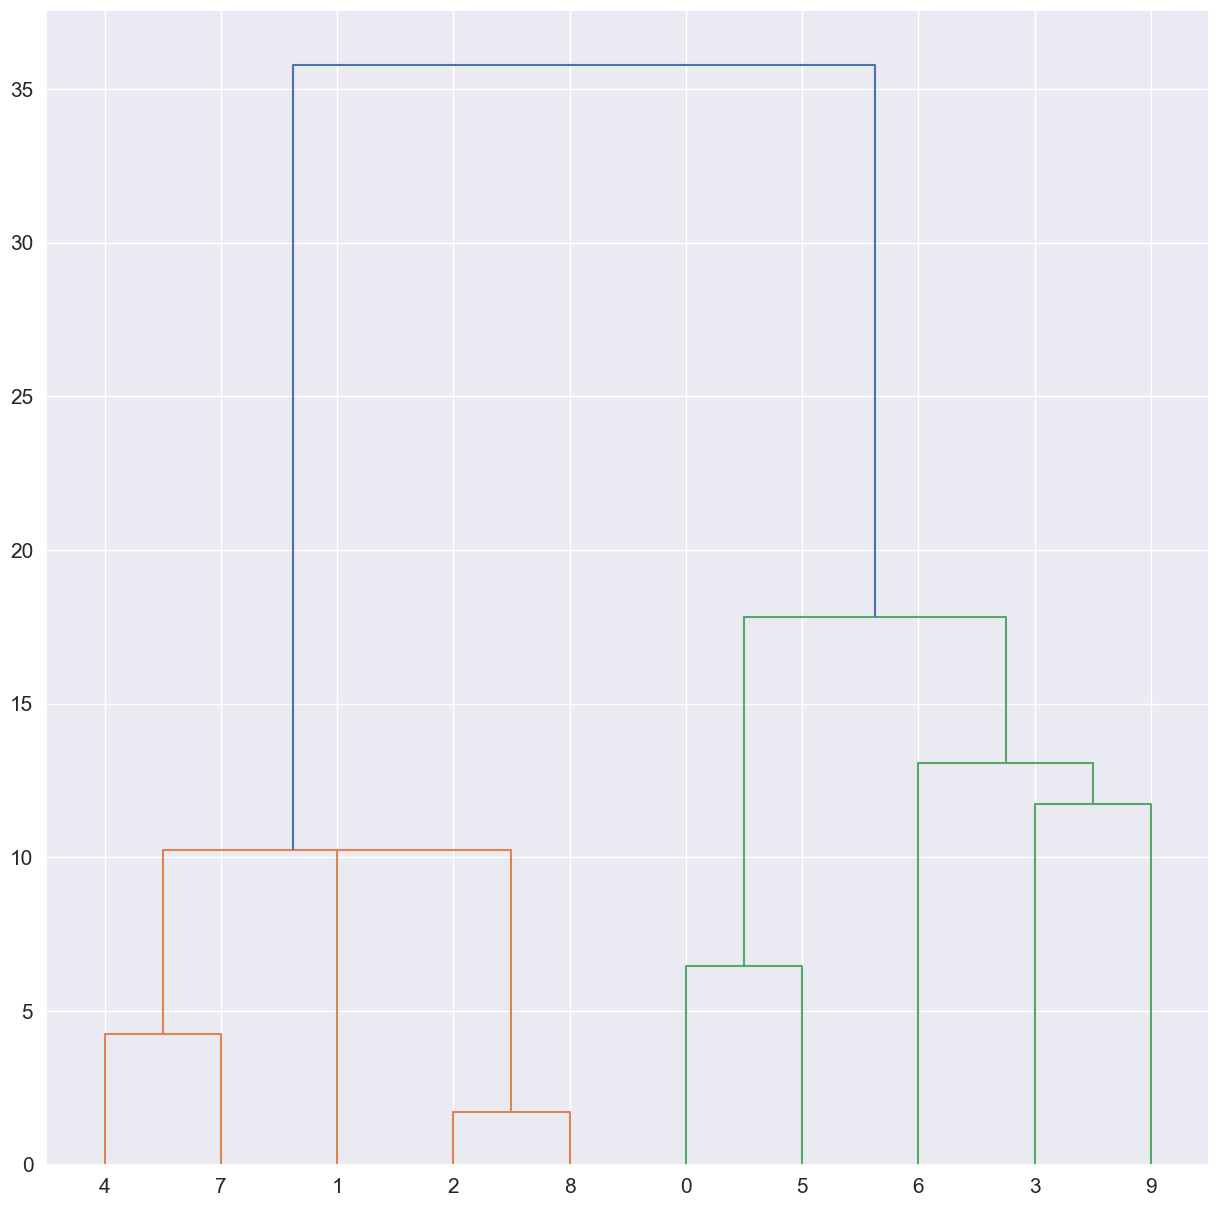

In [19]:
##############-------------------------->
## Visualize distances
################################################
from sklearn.metrics.pairwise import pairwise_distances
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print(Euc_dist)
X=DF3D
#sns.set()  #back to defaults
sns.set(font_scale=3)
Z = linkage(squareform(np.around(euclidean_distances(X), 3)))

fig4 = plt.figure(figsize=(15, 15))
ax4 = fig4.add_subplot(111)
dendrogram(Z, ax=ax4)
ax4.tick_params(axis='x', which='major', labelsize=15)
ax4.tick_params(axis='y', which='major', labelsize=15)
#ax5 = fig4.add_subplot(212)
fig4.savefig('exampleSave.png')


## Normalizing...via scaling MIN MAX

For the heatmap, we must normalize first

[[ 84 250  17]
 [ 72 200  16]
 [ 70 210  15]
 [ 86 278  18]
 [ 74 190  15]
 [ 80 245  16]
 [ 79 267  19]
 [ 71 187  15]
 [ 69 211  14]
 [ 82 289  17]]
Index(['Height', 'Weight', 'Age'], dtype='object')


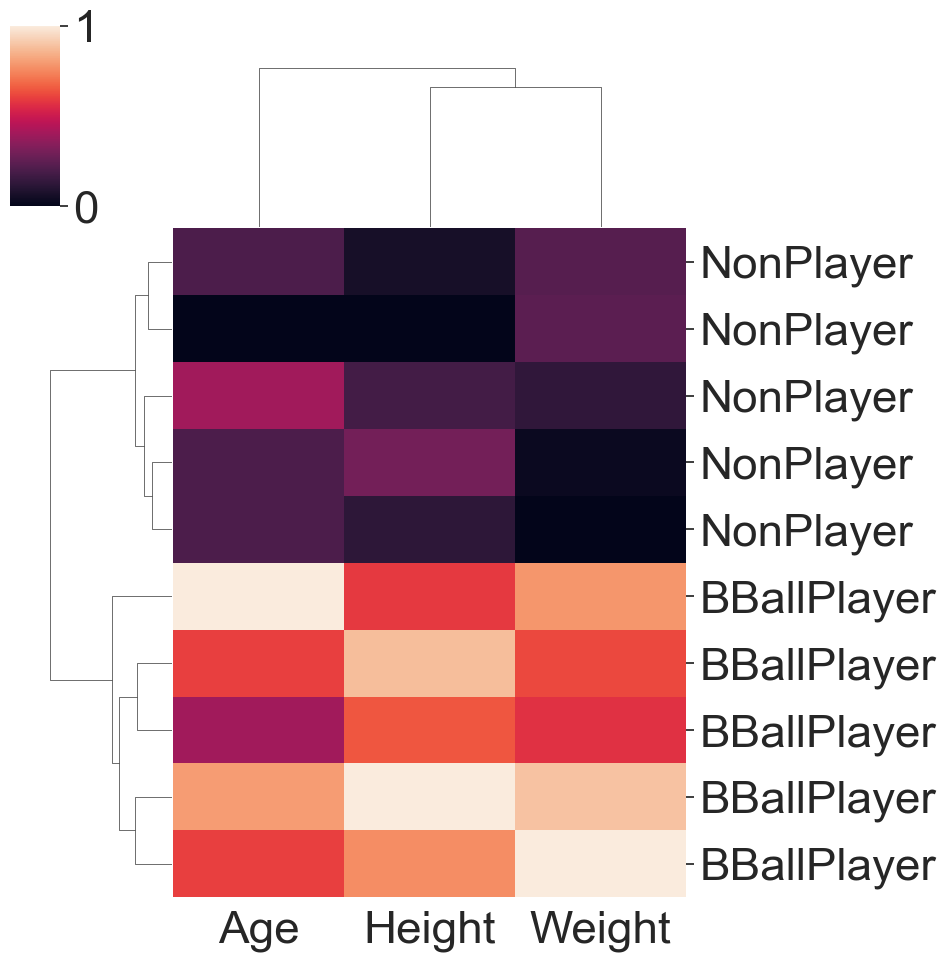

In [20]:
#import pandas as pd
from sklearn import preprocessing

x = X.values #returns a numpy array
print(x)
#Instantiate the min-max scaler
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
DF3D_scaled = pd.DataFrame(x_scaled)
print(DF3D.columns)
sns.clustermap(DF3D_scaled,yticklabels=TrueLabel3D, 
               xticklabels=DF3D.columns)



##   Silhouette and Elbow - Optimal Clusters...

In [21]:
from sklearn.metrics import silhouette_samples, silhouette_score

#import pandas as pd
#import numpy as np
#import seaborn as sns
#from sklearn.cluster import KMeans
#from sklearn.metrics import silhouette_score
 

The Silhouette Method helps to determine the optimal number of clustersin kmeans clustering...
    
Silhouette Coefficient = $\frac{x-y}{max(x,y)}$

where, 
- y is the mean intra cluster distance - the mean distance to the other instances in the same cluster. 
- x depicts mean nearest cluster distance i.e. the mean distance to the instances of the next closest cluster.
- The coefficient varies between -1 and 1. 

A value close to 1 implies that the instance is close to its cluster is a part of the right cluster. 
Whereas, a value close to -1 means that the value is assigned to the wrong cluster.

[https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html]

---

The silhouette_score gives the average value for all the samples.
This gives a perspective into the density and separation of the formed clusters
    
This example is generated from a random mixture of normal data...

ref:[https://towardsdatascience.com/silhouette-coefficient-validating-clustering-techniques-e976bb81d10c]

[[0.32976588 0.97079191]
 [0.20120356 0.04009186]
 [0.38313339 0.27913774]
 [0.98233017 0.98146807]
 [0.6096413  0.72870224]
 [0.42425405 0.56979719]
 [0.24153806 0.6710165 ]
 [0.03193591 0.66014036]
 [0.93198236 0.8070802 ]
 [0.98223418 0.38595403]
 [0.29497654 0.02886848]
 [0.76703864 0.43342235]
 [0.01431254 0.84507473]
 [0.65040721 0.38089811]
 [0.23823512 0.8107643 ]
 [0.94111515 0.25991042]
 [0.45572627 0.83473494]
 [0.83247975 0.09558967]
 [0.20284777 0.20313933]
 [0.26509032 0.84778321]
 [0.48909685 0.47718723]
 [0.86557642 0.28014778]
 [0.30693886 0.88190572]
 [0.69362372 0.81305939]
 [0.64513899 0.47749519]
 [0.01471519 0.71855359]
 [0.21078793 0.14093666]
 [0.44518248 0.23969958]
 [0.42701161 0.85993369]
 [0.65351675 0.35083823]
 [0.32982363 0.65587497]
 [0.86091611 0.67815325]
 [0.36599916 0.99143181]
 [0.17482511 0.89020909]
 [0.78515537 0.32604585]
 [0.13705699 0.01232289]
 [0.80673377 0.20571035]
 [0.77797354 0.70243472]
 [0.05931562 0.89148179]
 [0.65497694 0.30307239]


C:\Users\rokka\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rokka\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Silhouette Score for k=2
 0.8160709896912354


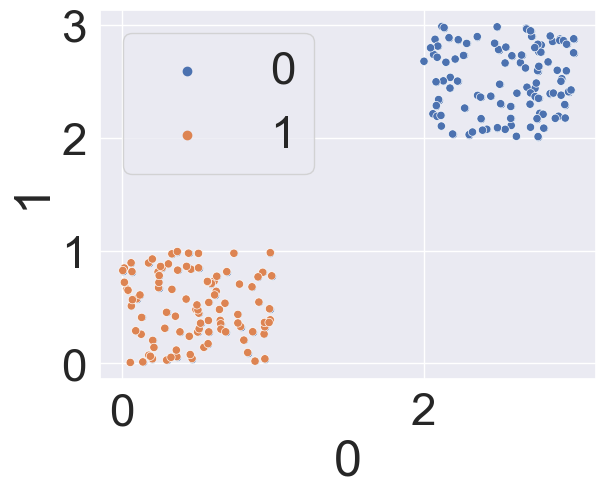

In [22]:
X= np.random.rand(100,2)
print(X)
Y= 2 + np.random.rand(100,2)
Z= np.concatenate((X,Y))
Z=pd.DataFrame(Z) 
print(Z.head())

sns.scatterplot(x=Z[0],y=Z[1])

KMean= KMeans(n_clusters=2)
KMean.fit(Z)
label=KMean.predict(Z)
print(label)

sns.scatterplot(x=Z[0],y=Z[1], hue=label)
print("Silhouette Score for k=2\n",silhouette_score(Z, label))

C:\Users\rokka\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rokka\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Score for k=3
 0.5972408251103292


C:\Users\rokka\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rokka\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Score for k=4
 0.3837068579147534


<AxesSubplot: xlabel='0', ylabel='1'>

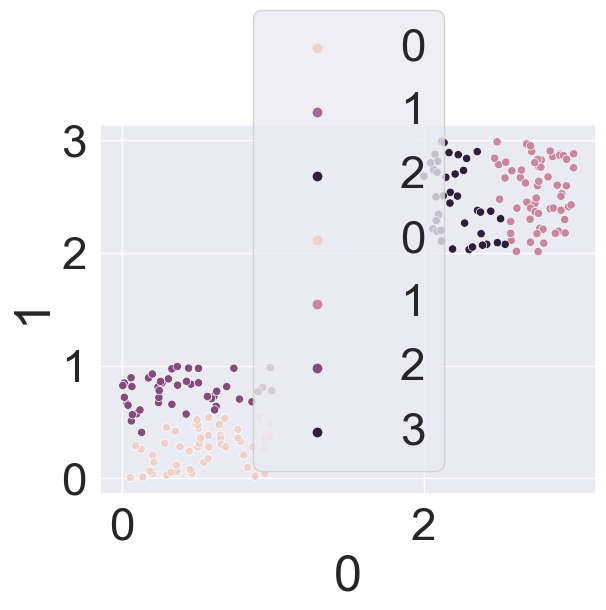

In [23]:
## Now - for k = 3
KMean= KMeans(n_clusters=3)
KMean.fit(Z)
label=KMean.predict(Z)
print("Silhouette Score for k=3\n",silhouette_score(Z, label))
sns.scatterplot(x=Z[0],y=Z[1], hue=label)

## Now - for k = 4
KMean= KMeans(n_clusters=4)
KMean.fit(Z)
label=KMean.predict(Z)
print("Silhouette Score for k=4\n",silhouette_score(Z, label))
sns.scatterplot(x=Z[0],y=Z[1], hue=label)


## Silhouette Example from sklearn


In [24]:
from sklearn.datasets import make_blobs
#from sklearn.cluster import KMeans
#from sklearn.metrics import silhouette_samples, silhouette_score

#import matplotlib.pyplot as plt
import matplotlib.cm as cm
#import numpy as np


X, y = make_blobs(n_samples=500,
                  n_features=2, ## so it is 2D
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

print(X)

[[-6.92324165e+00 -1.06695320e+01]
 [-8.63062033e+00 -7.13940564e+00]
 [-9.63048069e+00 -2.72044935e+00]
 [-2.30647659e+00  5.30797676e+00]
 [-7.57005366e+00 -3.01446491e+00]
 [-1.00051011e+00  2.77905153e+00]
 [-4.81826839e+00 -2.77214822e+00]
 [-5.33964799e+00 -1.27625764e+00]
 [-7.94308840e+00 -3.89993901e+00]
 [-5.54924525e+00 -3.41298968e+00]
 [-5.14508990e+00 -9.54492198e+00]
 [-7.09669936e+00 -8.04074036e+00]
 [-5.82641512e+00 -1.96346196e+00]
 [-1.83198811e+00  3.52863145e+00]
 [-7.34267235e+00 -3.16546482e+00]
 [-7.34072825e+00 -6.92427252e+00]
 [-7.94653906e+00 -3.36768655e+00]
 [-8.24598536e+00 -8.61315821e+00]
 [-1.98197711e+00  4.02243551e+00]
 [-4.35098035e+00 -3.69476678e+00]
 [-1.04768696e+01 -3.60318139e+00]
 [-1.10195984e+01 -3.15882031e+00]
 [-5.17255904e+00 -4.31835971e+00]
 [-2.40671820e+00  6.09894447e+00]
 [-6.72149498e+00 -2.88440806e+00]
 [-6.58935963e+00 -4.43379548e+00]
 [-1.46126019e+00  4.52549851e+00]
 [-9.19003455e-01  3.45278927e+00]
 [-1.04093517e+01 -2

C:\Users\rokka\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rokka\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.7049787496083262


C:\Users\rokka\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rokka\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.5882004012129721


C:\Users\rokka\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rokka\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.6505186632729437


C:\Users\rokka\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rokka\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.56376469026194


C:\Users\rokka\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rokka\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.4504666294372765


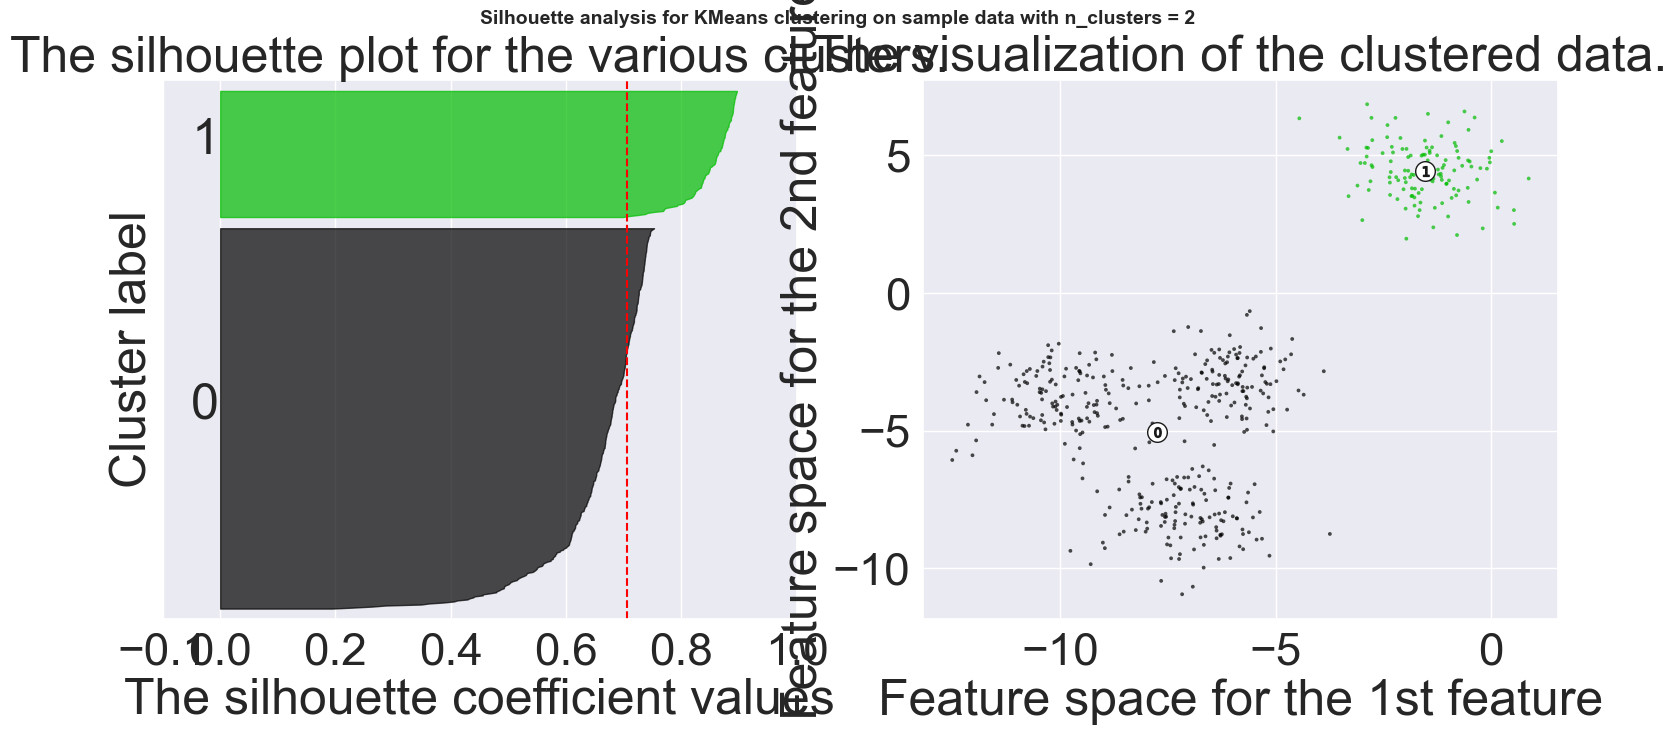

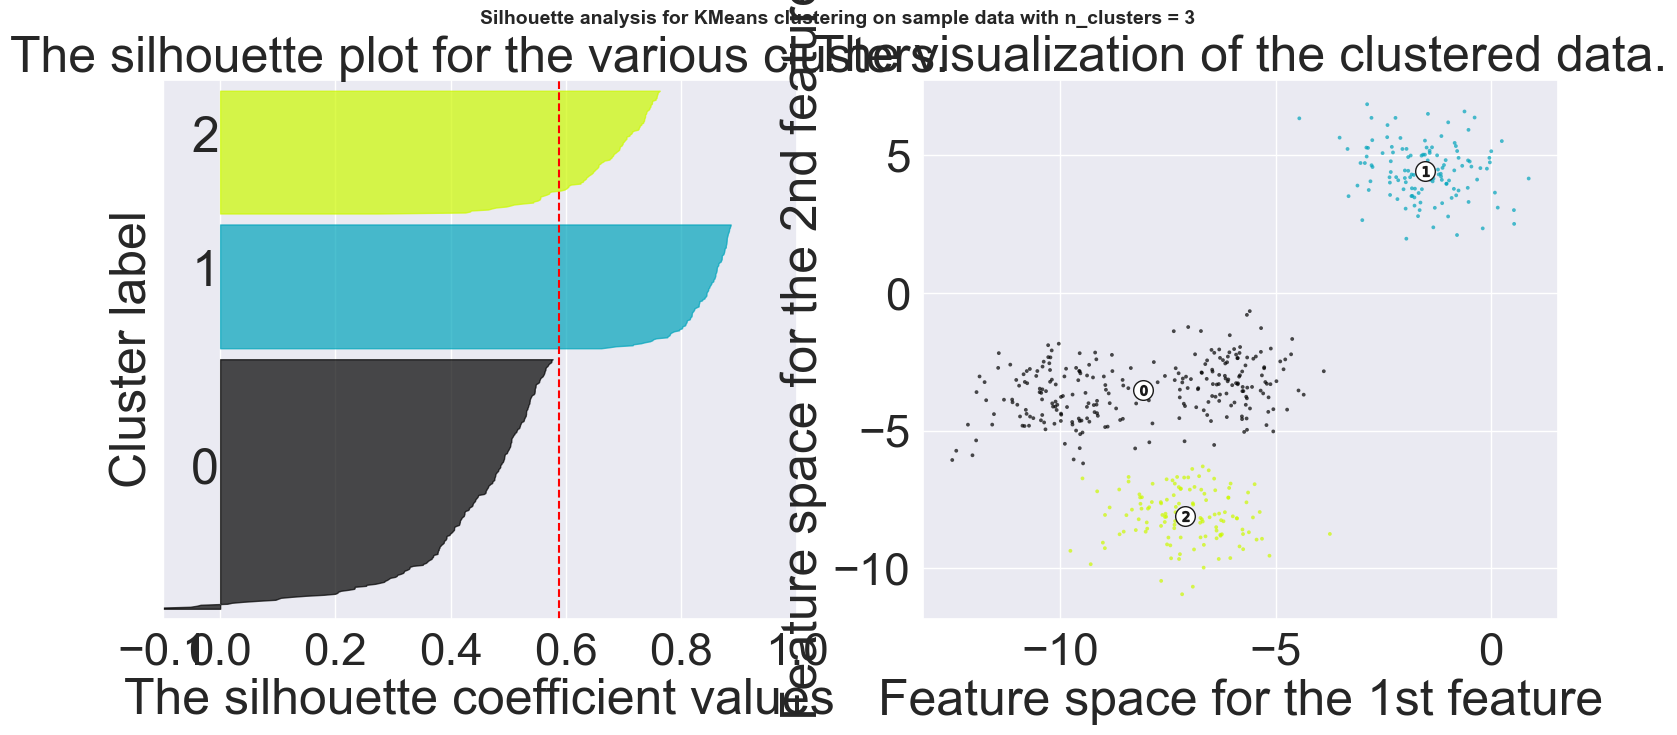

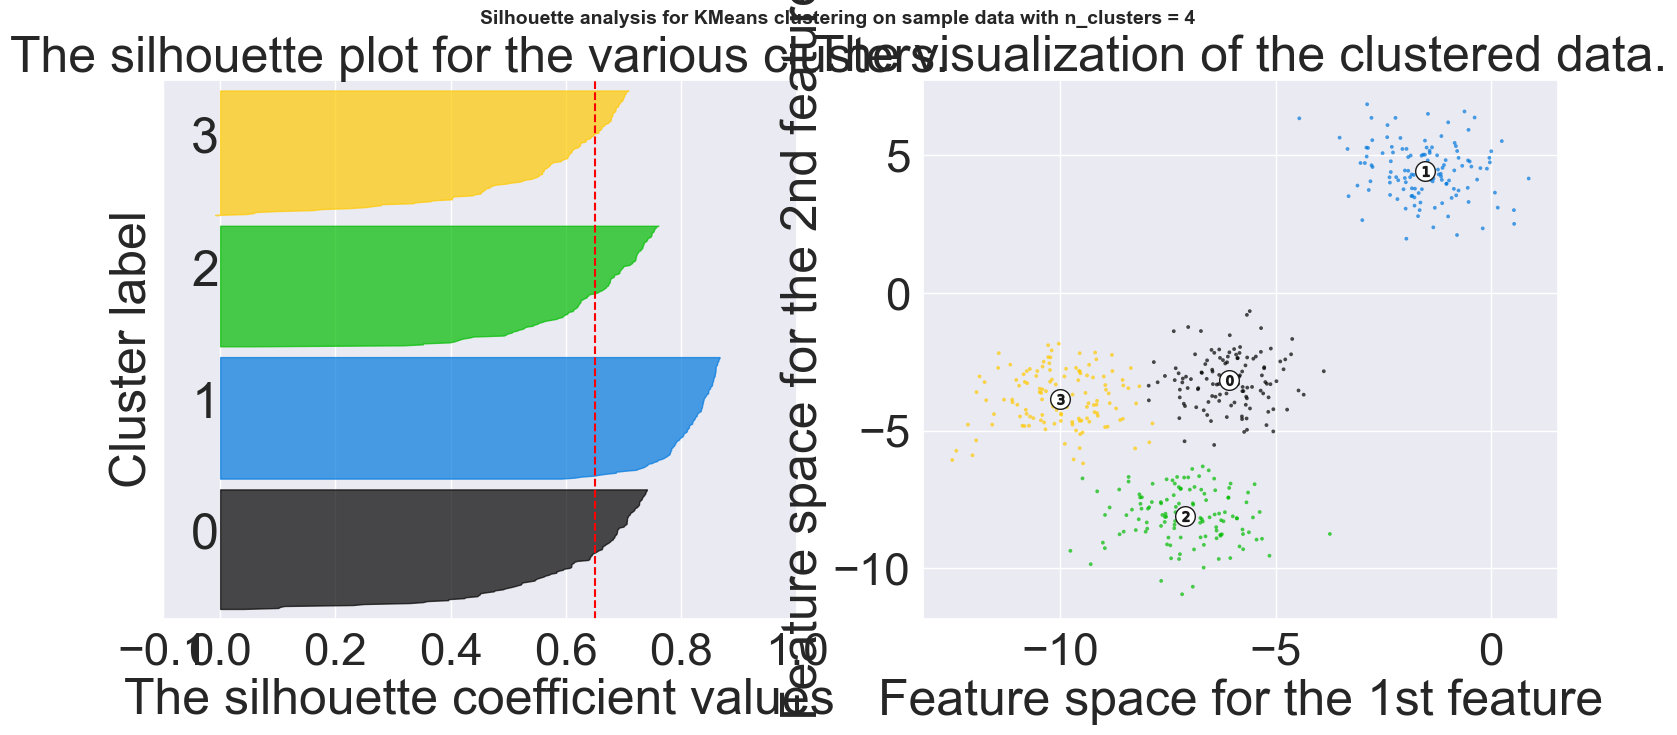

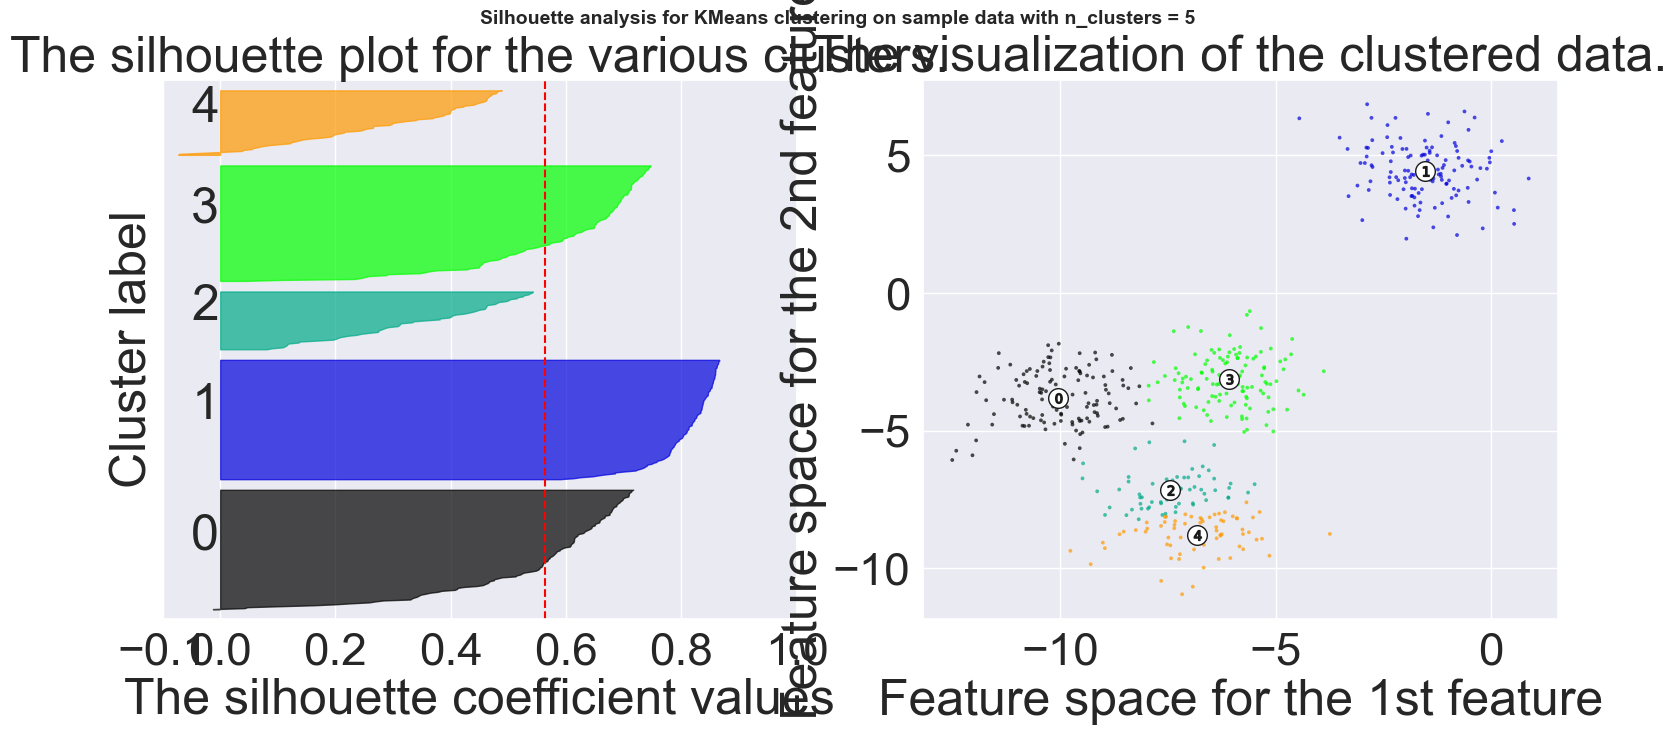

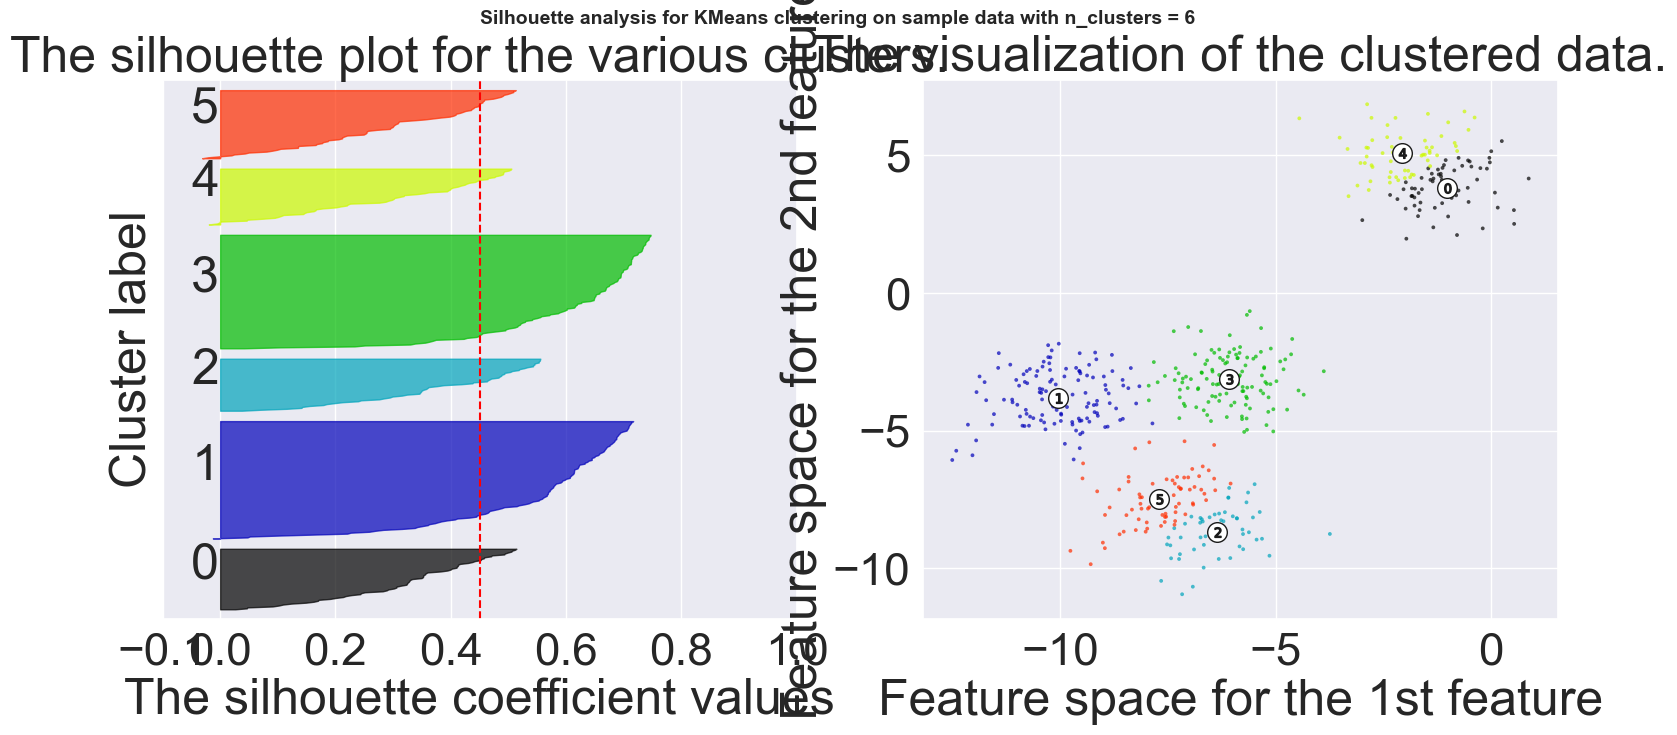

In [25]:
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()



## References:
[https://ncss-wpengine.netdna-ssl.com/wp-content/themes/ncss/pdf/Procedures/NCSS/Hierarchical_Clustering-Dendrograms.pdf]

### Overview of distances reference....
'minkowski', 'cityblock', 'cosine', 'correlation','hamming', 'jaccard', 'chebyshev', 'canberra','mahalanobis', VI=None...
 
RE: [https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html#scipy.spatial.distance.pdist]